In [5]:
import sys
#sys.path.append("D:\GitHub\pymrghost")
import eqdist_grappa
import mrfft
import numpy as np

In [17]:
import scipy.io
brain_data = scipy.io.loadmat(r"C:\matlab_plugin\ESPIRiT\data\brain_32ch.mat")['DATA']
calib = mrfft.crop(brain_data, [30,30,brain_data.shape[2]])
block_size = (4, 4)
acc_factors_2d = (2, 3)
regularization_factor = 0.001

brain_data_und = np.zeros_like(brain_data)
brain_data_und[::acc_factors_2d[0],::acc_factors_2d[1],:] = brain_data[::acc_factors_2d[0],::acc_factors_2d[1],:]

# Run the GRAPPA weight calibration
grappa_weights = eqdist_grappa.GRAPPA_calibrate_weights_2d(calib, acc_factors_2d, block_size, regularization_factor)

kspace_recon_kykxc, image_coilcombined_sos, unmixing_map_coilWise = eqdist_grappa.GRAPPA_interpolate_imageSpace_2d(
    brain_data_und, acc_factors_2d, block_size, grappa_weights)

regularization_factor 0.001
Recalculate GRAPPA unmixing map


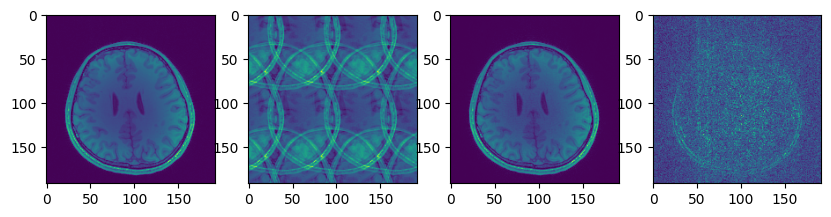

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data,axes=(0,1))))
plt.subplot(1,4,2)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data_und,axes=(0,1))))
plt.subplot(1,4,3)
plt.imshow(mrfft.sos(mrfft.ifft2c(kspace_recon_kykxc,axes=(0,1))))
plt.subplot(1,4,4)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-kspace_recon_kykxc,axes=(0,1))))
plt.show()

In [19]:
## test data with slightly different sampling pattern
calib = mrfft.crop(brain_data, [30,30,brain_data.shape[2]])
block_size = (4, 4)
acc_factors_2d = (2, 3)
regularization_factor = 0.001
brain_data_und = np.zeros_like(brain_data)
# I changed the start point here
brain_data_und[2::acc_factors_2d[0],1::acc_factors_2d[1],:] = brain_data[2::acc_factors_2d[0],1::acc_factors_2d[1],:]

# Run the GRAPPA weight calibration
grappa_weights = eqdist_grappa.GRAPPA_calibrate_weights_2d(calib, acc_factors_2d, block_size, regularization_factor)

kspace_recon_kykxc, image_coilcombined_sos, unmixing_map_coilWise = eqdist_grappa.GRAPPA_interpolate_imageSpace_2d(
    brain_data_und, acc_factors_2d, block_size, grappa_weights)

regularization_factor 0.001
Recalculate GRAPPA unmixing map


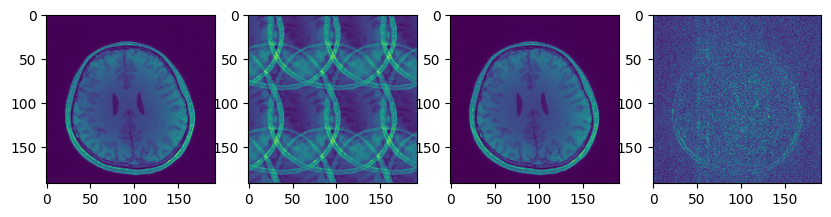

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data,axes=(0,1))))
plt.subplot(1,4,2)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data_und,axes=(0,1))))
plt.subplot(1,4,3)
plt.imshow(mrfft.sos(mrfft.ifft2c(kspace_recon_kykxc,axes=(0,1))))
plt.subplot(1,4,4)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-kspace_recon_kykxc,axes=(0,1))))
plt.show()

In [25]:
## test data with different matrix size of undersampled data
calib = mrfft.crop(brain_data, [30,25,brain_data.shape[2]])
block_size = (4, 4)
acc_factors_2d = (2, 3)
regularization_factor = 0.001
brain_data_und = np.zeros_like(brain_data)
brain_data_und[2::acc_factors_2d[0],1::acc_factors_2d[1],:] = brain_data[2::acc_factors_2d[0],1::acc_factors_2d[1],:]
brain_data_und = mrfft.crop(brain_data_und, [78,99,32])
# Run the GRAPPA weight calibration
grappa_weights = eqdist_grappa.GRAPPA_calibrate_weights_2d(calib, acc_factors_2d, block_size, regularization_factor)

kspace_recon_kykxc, image_coilcombined_sos, unmixing_map_coilWise = eqdist_grappa.GRAPPA_interpolate_imageSpace_2d(
    brain_data_und, acc_factors_2d, block_size, grappa_weights)


regularization_factor 0.001
Recalculate GRAPPA unmixing map


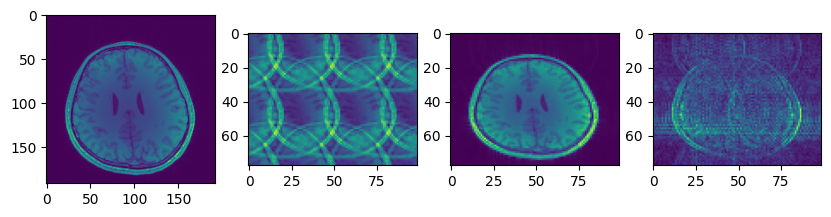

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data,axes=(0,1))))
plt.subplot(1,4,2)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data_und,axes=(0,1))))
plt.subplot(1,4,3)
plt.imshow(mrfft.sos(mrfft.ifft2c(kspace_recon_kykxc,axes=(0,1))))
plt.subplot(1,4,4)
plt.imshow(mrfft.sos(mrfft.ifft2c(mrfft.crop(brain_data, [78,99,32])-kspace_recon_kykxc,axes=(0,1))))
plt.show()

In [28]:
## test data with fully sampled central areas
calib = mrfft.crop(brain_data, [30,30,brain_data.shape[2]])
block_size = (4, 4)
acc_factors_2d = (2, 3)
regularization_factor = 0.001
brain_data_und = np.zeros_like(brain_data)
brain_data_und[2::acc_factors_2d[0],1::acc_factors_2d[1],:] = brain_data[2::acc_factors_2d[0],1::acc_factors_2d[1],:]
nx, ny, nc = brain_data.shape
brain_data_und[nx//2-10:nx//2+10,ny//2-10:ny//2+10,:] = brain_data[nx//2-10:nx//2+10,ny//2-10:ny//2+10,:]

# Run the GRAPPA weight calibration
grappa_weights = eqdist_grappa.GRAPPA_calibrate_weights_2d(calib, acc_factors_2d, block_size, regularization_factor)

kspace_recon_kykxc, image_coilcombined_sos, unmixing_map_coilWise = eqdist_grappa.GRAPPA_interpolate_imageSpace_2d(
    brain_data_und, acc_factors_2d, block_size, grappa_weights)

regularization_factor 0.001
Recalculate GRAPPA unmixing map


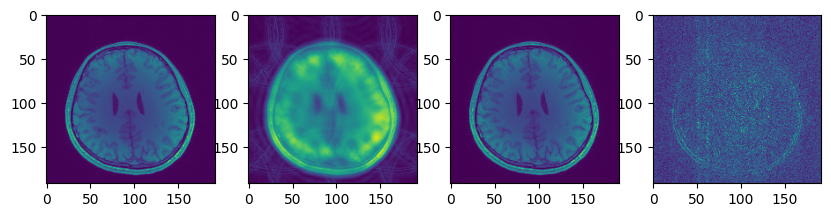

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data,axes=(0,1))))
plt.subplot(1,4,2)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data_und,axes=(0,1))))
plt.subplot(1,4,3)
plt.imshow(mrfft.sos(mrfft.ifft2c(kspace_recon_kykxc,axes=(0,1))))
plt.subplot(1,4,4)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-kspace_recon_kykxc,axes=(0,1))))
plt.show()

In [30]:
# higher acceleration
calib = mrfft.crop(brain_data, [30,30,brain_data.shape[2]])
block_size = (4, 4)
acc_factors_2d = (3, 4)
regularization_factor = 0.001
brain_data_und = np.zeros_like(brain_data)
brain_data_und[2::acc_factors_2d[0],1::acc_factors_2d[1],:] = brain_data[2::acc_factors_2d[0],1::acc_factors_2d[1],:]

# Run the GRAPPA weight calibration
grappa_weights = eqdist_grappa.GRAPPA_calibrate_weights_2d(calib, acc_factors_2d, block_size, regularization_factor)

kspace_recon_kykxc, image_coilcombined_sos, unmixing_map_coilWise = eqdist_grappa.GRAPPA_interpolate_imageSpace_2d(
    brain_data_und, acc_factors_2d, block_size, grappa_weights)

regularization_factor 0.001
Recalculate GRAPPA unmixing map


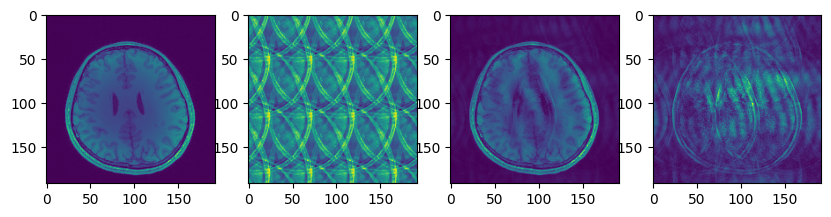

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data,axes=(0,1))))
plt.subplot(1,4,2)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data_und,axes=(0,1))))
plt.subplot(1,4,3)
plt.imshow(mrfft.sos(mrfft.ifft2c(kspace_recon_kykxc,axes=(0,1))))
plt.subplot(1,4,4)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-kspace_recon_kykxc,axes=(0,1))))
plt.show()

In [32]:
# higher acceleration with center signals
calib = mrfft.crop(brain_data, [30,30,brain_data.shape[2]])
block_size = (4, 4)
acc_factors_2d = (3, 4)
regularization_factor = 0.001
brain_data_und = np.zeros_like(brain_data)
brain_data_und[2::acc_factors_2d[0],1::acc_factors_2d[1],:] = brain_data[2::acc_factors_2d[0],1::acc_factors_2d[1],:]
nx, ny, nc = brain_data.shape
brain_data_und[nx//2-10:nx//2+10,ny//2-10:ny//2+10,:] = brain_data[nx//2-10:nx//2+10,ny//2-10:ny//2+10,:]
# Run the GRAPPA weight calibration
grappa_weights = eqdist_grappa.GRAPPA_calibrate_weights_2d(calib, acc_factors_2d, block_size, regularization_factor)

kspace_recon_kykxc, image_coilcombined_sos, unmixing_map_coilWise = eqdist_grappa.GRAPPA_interpolate_imageSpace_2d(
    brain_data_und, acc_factors_2d, block_size, grappa_weights)

regularization_factor 0.001
Recalculate GRAPPA unmixing map


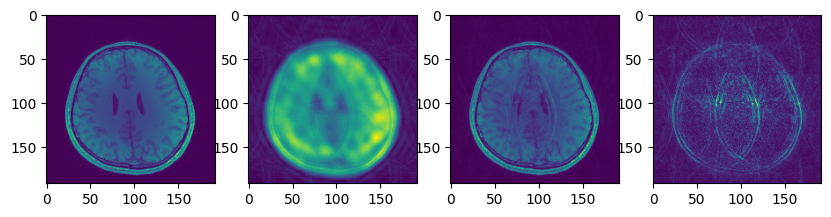

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data,axes=(0,1))))
plt.subplot(1,4,2)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data_und,axes=(0,1))))
plt.subplot(1,4,3)
plt.imshow(mrfft.sos(mrfft.ifft2c(kspace_recon_kykxc,axes=(0,1))))
plt.subplot(1,4,4)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-kspace_recon_kykxc,axes=(0,1))))
plt.show()

In [35]:
# speed comparison
import pygrappa
calib = mrfft.crop(brain_data, [30,30,brain_data.shape[2]])
block_size = (4, 4)
acc_factors_2d = (2, 2)
regularization_factor = 0.001
brain_data_und = np.zeros_like(brain_data)
brain_data_und[::acc_factors_2d[0],::acc_factors_2d[1],:] = brain_data[::acc_factors_2d[0],::acc_factors_2d[1],:]

In [41]:
%time grappa_weights = eqdist_grappa.GRAPPA_calibrate_weights_2d(calib, acc_factors_2d, block_size, regularization_factor)

regularization_factor 0.001
CPU times: total: 1min 35s
Wall time: 15.8 s


In [42]:
%time kspace_recon_kykxc, image_coilcombined_sos, unmixing_map_coilWise = eqdist_grappa.GRAPPA_interpolate_imageSpace_2d(brain_data_und, acc_factors_2d, block_size, grappa_weights)

Recalculate GRAPPA unmixing map
CPU times: total: 2.88 s
Wall time: 2.88 s


In [49]:
%time res_kernel5=pygrappa.grappa(brain_data_und, calib, kernel_size=(5,5), lamda=regularization_factor)# note that kernel_size in pygrapp is different from block_size of ours

CPU times: total: 26.9 s
Wall time: 5.14 s


In [54]:
%time res_kernel7=pygrappa.grappa(brain_data_und, calib, kernel_size=(7,7), lamda=0.01)# note that kernel_size in pygrapp is different from block_size of ours

CPU times: total: 4min 13s
Wall time: 41.8 s


In [56]:
%time res_kernel9=pygrappa.grappa(brain_data_und, calib, kernel_size=(9,9), lamda=0.01)# note that kernel_size in pygrapp is different from block_size of ours

CPU times: total: 12min 30s
Wall time: 2min 4s


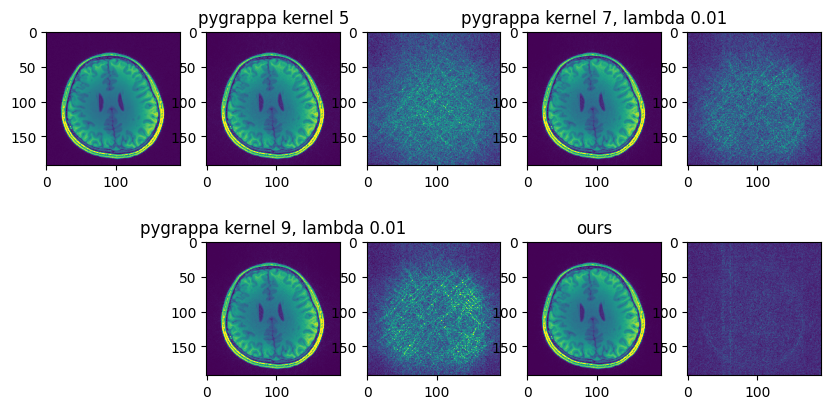

In [58]:
plt.figure(figsize=(10,5))
vmax=np.percentile(mrfft.sos(mrfft.ifft2c(brain_data,axes=(0,1))),99)
plt.subplot(2,5,1)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data,axes=(0,1))),vmax=vmax)
plt.subplot(2,5,2)
plt.imshow(mrfft.sos(mrfft.ifft2c(res_kernel5,axes=(0,1))),vmax=vmax)
plt.title('pygrappa kernel 5')
plt.subplot(2,5,3)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-res_kernel5,axes=(0,1))),vmax=vmax/10)
plt.subplot(2,5,4)
plt.imshow(mrfft.sos(mrfft.ifft2c(res_kernel7,axes=(0,1))),vmax=vmax)
plt.title('pygrappa kernel 7, lambda 0.01')
plt.subplot(2,5,5)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-res_kernel7,axes=(0,1))),vmax=vmax/10)
plt.subplot(2,5,7)
plt.imshow(mrfft.sos(mrfft.ifft2c(res_kernel9,axes=(0,1))),vmax=vmax)
plt.title('pygrappa kernel 9, lambda 0.01')
plt.subplot(2,5,8)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-res_kernel9,axes=(0,1))),vmax=vmax/10)
plt.subplot(2,5,9)
plt.imshow(mrfft.sos(mrfft.ifft2c(kspace_recon_kykxc,axes=(0,1))),vmax=vmax)
plt.title('ours')
plt.subplot(2,5,10)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-kspace_recon_kykxc,axes=(0,1))),vmax=vmax/10)
plt.show()

In [59]:
# let's try 8ch data now
brain_data = scipy.io.loadmat(r"C:\matlab_plugin\ESPIRiT\data\brain_8ch.mat")['DATA']
calib = mrfft.crop(brain_data, [30,30,brain_data.shape[2]])
block_size = (4, 4)
acc_factors_2d = (2, 2)
regularization_factor = 0.001

brain_data_und = np.zeros_like(brain_data)
brain_data_und[::acc_factors_2d[0],::acc_factors_2d[1],:] = brain_data[::acc_factors_2d[0],::acc_factors_2d[1],:]

In [60]:
%time grappa_weights = eqdist_grappa.GRAPPA_calibrate_weights_2d(calib, acc_factors_2d, block_size, regularization_factor)

regularization_factor 0.001
CPU times: total: 10 s
Wall time: 1.55 s


In [61]:
%time kspace_recon_kykxc, image_coilcombined_sos, unmixing_map_coilWise = eqdist_grappa.GRAPPA_interpolate_imageSpace_2d(brain_data_und, acc_factors_2d, block_size, grappa_weights)

Recalculate GRAPPA unmixing map
CPU times: total: 266 ms
Wall time: 269 ms


In [62]:
%time res_kernel5=pygrappa.grappa(brain_data_und, calib, kernel_size=(5,5), lamda=regularization_factor)# note that kernel_size in pygrapp is different from block_size of ours

CPU times: total: 484 ms
Wall time: 484 ms


In [69]:
%time res_kernel7=pygrappa.grappa(brain_data_und, calib, kernel_size=(7,7), lamda=0.01)# note that kernel_size in pygrapp is different from block_size of ours

CPU times: total: 6.69 s
Wall time: 1.65 s


In [70]:
%time res_kernel9=pygrappa.grappa(brain_data_und, calib, kernel_size=(9,9), lamda=0.01)# note that kernel_size in pygrapp is different from block_size of ours

CPU times: total: 14.8 s
Wall time: 3.3 s


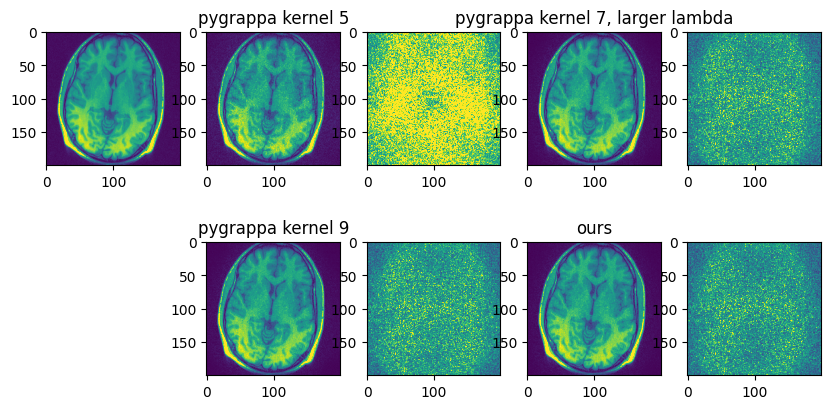

In [71]:
plt.figure(figsize=(10,5))
vmax=np.percentile(mrfft.sos(mrfft.ifft2c(brain_data,axes=(0,1))),99)
plt.subplot(2,5,1)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data,axes=(0,1))),vmax=vmax)
plt.subplot(2,5,2)
plt.imshow(mrfft.sos(mrfft.ifft2c(res_kernel5,axes=(0,1))),vmax=vmax)
plt.title('pygrappa kernel 5')
plt.subplot(2,5,3)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-res_kernel5,axes=(0,1))),vmax=vmax/10)
plt.subplot(2,5,4)
plt.imshow(mrfft.sos(mrfft.ifft2c(res_kernel7,axes=(0,1))),vmax=vmax)
plt.title('pygrappa kernel 7, larger lambda')
plt.subplot(2,5,5)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-res_kernel7,axes=(0,1))),vmax=vmax/10)
plt.subplot(2,5,7)
plt.imshow(mrfft.sos(mrfft.ifft2c(res_kernel9,axes=(0,1))),vmax=vmax)
plt.title('pygrappa kernel 9')
plt.subplot(2,5,8)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-res_kernel9,axes=(0,1))),vmax=vmax/10)
plt.subplot(2,5,9)
plt.imshow(mrfft.sos(mrfft.ifft2c(kspace_recon_kykxc,axes=(0,1))),vmax=vmax)
plt.title('ours')
plt.subplot(2,5,10)
plt.imshow(mrfft.sos(mrfft.ifft2c(brain_data-kspace_recon_kykxc,axes=(0,1))),vmax=vmax/10)
plt.show()